Source: UCI Machine Learning (https://archive.ics.uci.edu/dataset/174/parkinsons)

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column. For further information or to pass on comments, please contact Max Little (littlem '@' robots.ox.ac.uk).

Exploiting Nonlinear Recurrence and Fractal Scaling Properties for Voice Disorder Detection

By Max A. Little, P. McSharry, S. Roberts, D. Costello, I. Moroz. 2007

Published in BioMedical Engineering OnLine

Matrix column entries (attributes):

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several measures of variation in fundamental frequency

MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject; (1) - Parkinson's, (0) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df = pd.read_csv("parkinsons.data") #loading dataset onto Pandas dataframe
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 30)
print(df.shape) #dataset dimension
df.head(12)

(195, 24)


name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0   phon_R01_S01_1      119.992       157.302        74.997         0.00784   
1   phon_R01_S01_2      122.400       148.650       113.819         0.00968   
2   phon_R01_S01_3      116.682       131.111       111.555         0.01050   
3   phon_R01_S01_4      116.676       137.871       111.366         0.00997   
4   phon_R01_S01_5      116.014       141.781       110.655         0.01284   
5   phon_R01_S01_6      120.552       131.162       113.787         0.00968   
6   phon_R01_S02_1      120.267       137.244       114.820         0.00333   
7   phon_R01_S02_2      107.332       113.840       104.315         0.00290   
8   phon_R01_S02_3       95.730       132.068        91.754         0.00551   
9   phon_R01_S02_4       95.056       120.103        91.226         0.00532   
10  phon_R01_S02_5       88.333       112.240        84.072         0.00505   
11  phon_R01_S02_6       91.904       115.871        86.292         0.00540   

    MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0            0.00007   0.00370   0.00554     0.01109       0.04374   
1            0.00008   0.00465   0.00696     0.01394       0.06134   
2            0.00009   0.00544   0.00781     0.01633       0.05233   
3            0.00009   0.00502   0.00698     0.01505       0.05492   
4            0.00011   0.00655   0.00908     0.01966       0.06425   
5            0.00008   0.00463   0.00750     0.01388       0.04701   
6            0.00003   0.00155   0.00202     0.00466       0.01608   
7            0.00003   0.00144   0.00182     0.00431       0.01567   
8            0.00006   0.00293   0.00332     0.00880       0.02093   
9            0.00006   0.00268   0.00332     0.00803       0.02838   
10           0.00006   0.00254   0.00330     0.00763       0.02143   
11           0.00006   0.00281   0.00336     0.00844       0.02752   

    MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0              0.426       0.02182       0.03130   0.02971      0.06545   
1              0.626       0.03134       0.04518   0.04368      0.09403   
2              0.482       0.02757       0.03858   0.03590      0.08270   
3              0.517       0.02924       0.04005   0.03772      0.08771   
4              0.584       0.03490       0.04825   0.04465      0.10470   
5              0.456       0.02328       0.03526   0.03243      0.06985   
6              0.140       0.00779       0.00937   0.01351      0.02337   
7              0.134       0.00829       0.00946   0.01256      0.02487   
8              0.191       0.01073       0.01277   0.01717      0.03218   
9              0.255       0.01441       0.01725   0.02444      0.04324   
10             0.197       0.01079       0.01342   0.01892      0.03237   
11             0.249       0.01424       0.01641   0.02214      0.04272   

        NHR     HNR  status      RPDE       DFA   spread1   spread2        D2  \
0   0.02211  21.033       1  0.414783  0.815285 -4.813031  0.266482  2.301442   
1   0.01929  19.085       1  0.458359  0.819521 -4.075192  0.335590  2.486855   
2   0.01309  20.651       1  0.429895  0.825288 -4.443179  0.311173  2.342259   
3   0.01353  20.644       1  0.434969  0.819235 -4.117501  0.334147  2.405554   
4   0.01767  19.649       1  0.417356  0.823484 -3.747787  0.234513  2.332180   
5   0.01222  21.378       1  0.415564  0.825069 -4.242867  0.299111  2.187560   
6   0.00607  24.886       1  0.596040  0.764112 -5.634322  0.257682  1.854785   
7   0.00344  26.892       1  0.637420  0.763262 -6.167603  0.183721  2.064693   
8   0.01070  21.812       1  0.615551  0.773587 -5.498678  0.327769  2.322511   
9   0.01022  21.862       1  0.547037  0.798463 -5.011879  0.325996  2.432792   
10  0.01166  21.118       1  0.611137  0.776156 -5.249770  0.391002  2.407313   
11  0.01141  21.414       1  0.583390  0.792520 -4.960234  0.363566  2.642476   

         PPE  
0   0.284654  
1   0.368674  


In [2]:
df.dtypes #datatypes of each feature in the dataframe

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [3]:
df.isna().sum() #check for null values

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [4]:
df.loc[df.duplicated()] #check for duplicated values

Empty DataFrame
Columns: [name, MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

In [2]:
numerical_values = df.select_dtypes(exclude="object").columns.to_list() #selecting features with numerical values
new_dataframe = pd.DataFrame(df, columns=numerical_values) #dataframe with only numerical features
new_dataframe.describe() #general statistical description of the dataset

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
count   195.000000    195.000000    195.000000      195.000000   
mean    154.228641    197.104918    116.324631        0.006220   
std      41.390065     91.491548     43.521413        0.004848   
min      88.333000    102.145000     65.476000        0.001680   
25%     117.572000    134.862500     84.291000        0.003460   
50%     148.790000    175.829000    104.315000        0.004940   
75%     182.769000    224.205500    140.018500        0.007365   
max     260.105000    592.030000    239.170000        0.033160   

       MDVP:Jitter(Abs)    MDVP:RAP    MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
count        195.000000  195.000000  195.000000  195.000000    195.000000   
mean           0.000044    0.003306    0.003446    0.009920      0.029709   
std            0.000035    0.002968    0.002759    0.008903      0.018857   
min            0.000007    0.000680    0.000920    0.002040      0.009540   
25%            0.000020    0.001660    0.001860    0.004985      0.016505   
50%            0.000030    0.002500    0.002690    0.007490      0.022970   
75%            0.000060    0.003835    0.003955    0.011505      0.037885   
max            0.000260    0.021440    0.019580    0.064330      0.119080   

       MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5    MDVP:APQ  Shimmer:DDA  \
count        195.000000    195.000000    195.000000  195.000000   195.000000   
mean           0.282251      0.015664      0.017878    0.024081     0.046993   
std            0.194877      0.010153      0.012024    0.016947     0.030459   
min            0.085000      0.004550      0.005700    0.007190     0.013640   
25%            0.148500      0.008245      0.009580    0.013080     0.024735   
50%            0.221000      0.012790      0.013470    0.018260     0.038360   
75%            0.350000      0.020265      0.022380    0.029400     0.060795   
max            1.302000      0.056470      0.079400    0.137780     0.169420   

              NHR         HNR      status        RPDE         DFA     spread1  \
count  195.000000  195.000000  195.000000  195.000000  195.000000  195.000000   
mean     0.024847   21.885974    0.753846    0.498536    0.718099   -5.684397   
std      0.040418    4.425764    0.431878    0.103942    0.055336    1.090208   
min      0.000650    8.441000    0.000000    0.256570    0.574282   -7.964984   
25%      0.005925   19.198000    1.000000    0.421306    0.674758   -6.450096   
50%      0.011660   22.085000    1.000000    0.495954    0.722254   -5.720868   
75%      0.025640   25.075500    1.000000    0.587562    0.761881   -5.046192   
max      0.314820   33.047000    1.000000    0.685151    0.825288   -2.434031   

          spread2          D2         PPE  
count  195.000000  195.000000  195.000000  
mean     0.226510    2.381826    0.206552  
std      0.083406    0.382799    0.090119  
min      0.006274    1.423287    0.044539  
25%      0.174351    2.099125    0.137451  
50%      0.218885    2.361532    0.194052  
75%      0.279234    2.636456    0.252980  
max      0.450493    3.671155    0.527367

In [3]:
new_dataframe.skew() #skewness of each feature

MDVP:Fo(Hz)         0.591737
MDVP:Fhi(Hz)        2.542146
MDVP:Flo(Hz)        1.217350
MDVP:Jitter(%)      3.084946
MDVP:Jitter(Abs)    2.649071
MDVP:RAP            3.360708
MDVP:PPQ            3.073892
Jitter:DDP          3.362058
MDVP:Shimmer        1.666480
MDVP:Shimmer(dB)    1.999389
Shimmer:APQ3        1.580576
Shimmer:APQ5        1.798697
MDVP:APQ            2.618047
Shimmer:DDA         1.580618
NHR                 4.220709
HNR                -0.514317
status             -1.187727
RPDE               -0.143402
DFA                -0.033214
spread1             0.432139
spread2             0.144430
D2                  0.430384
PPE                 0.797491
dtype: float64

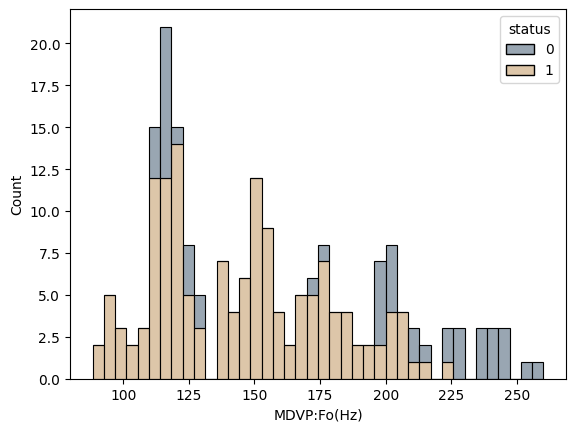

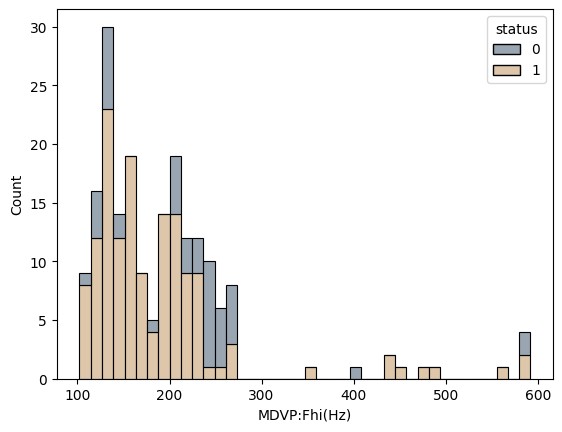

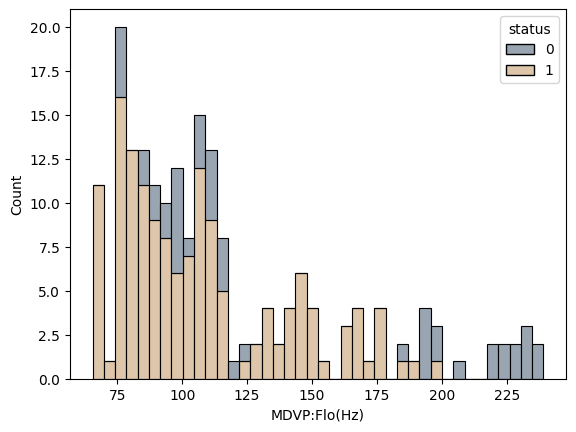

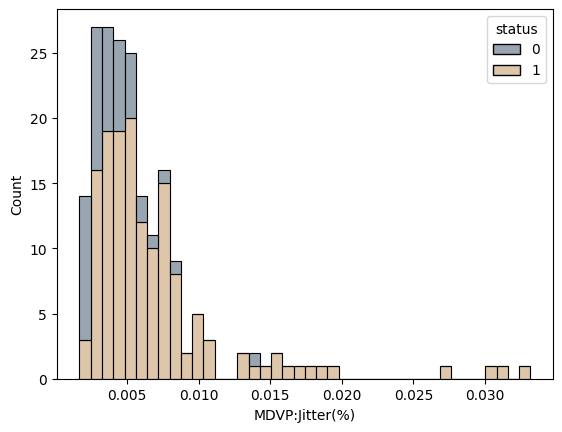

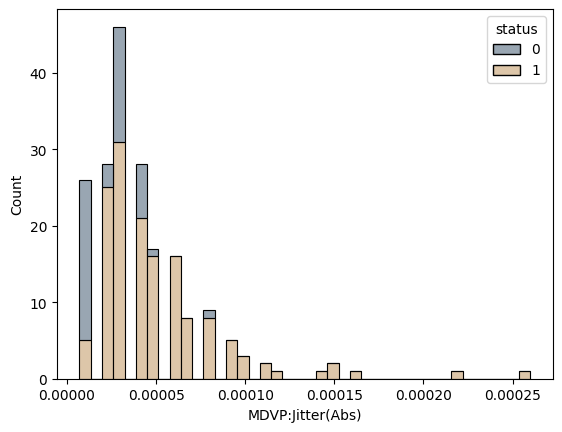

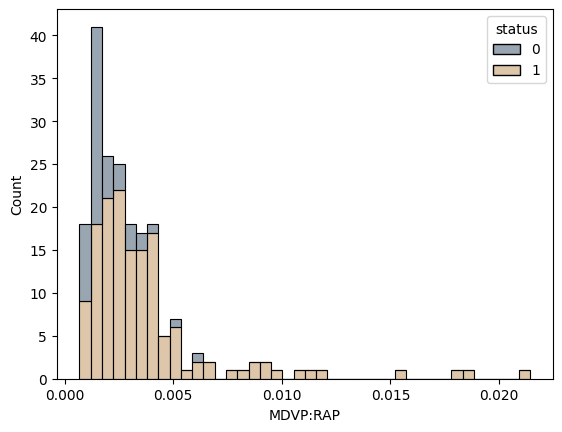

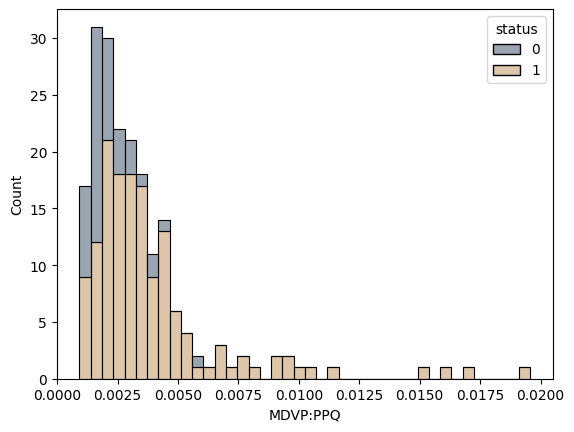

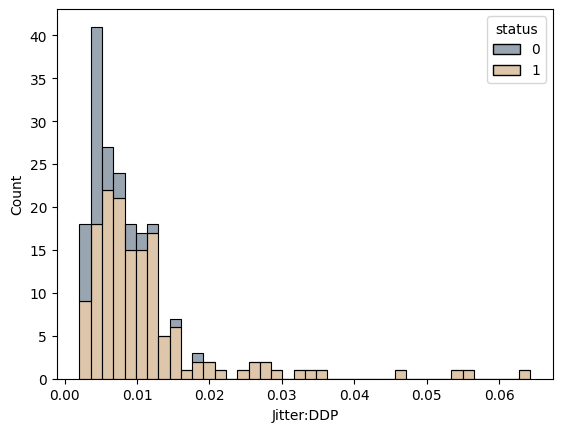

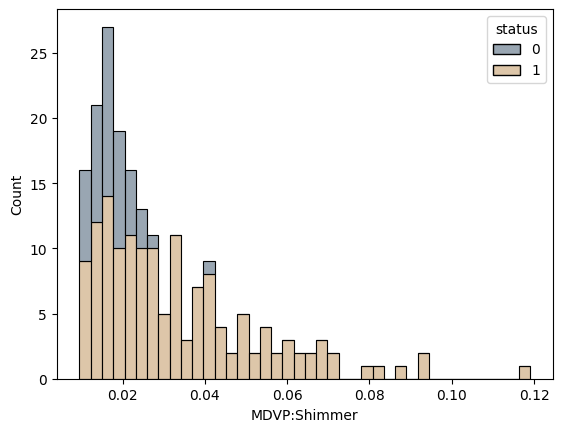

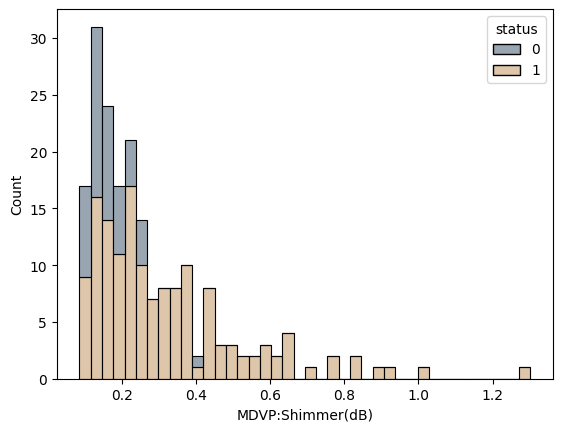

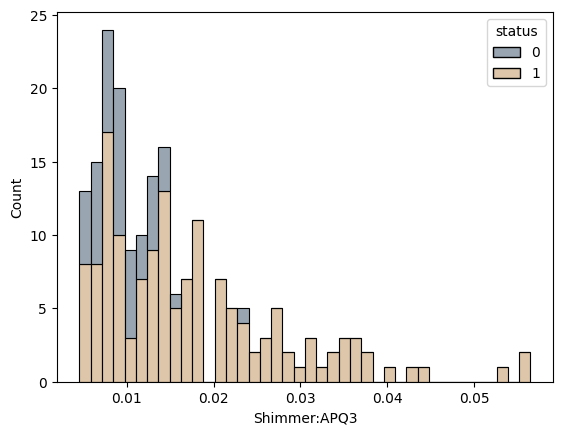

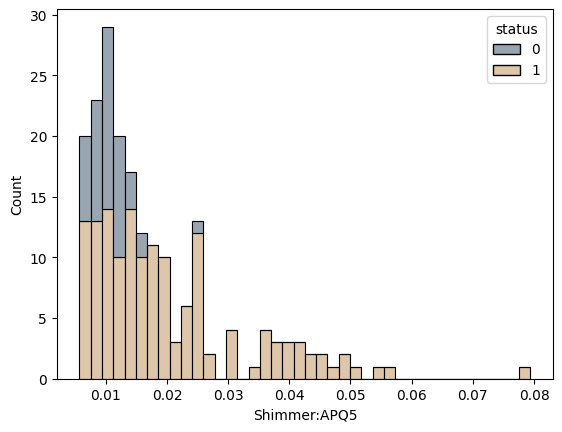

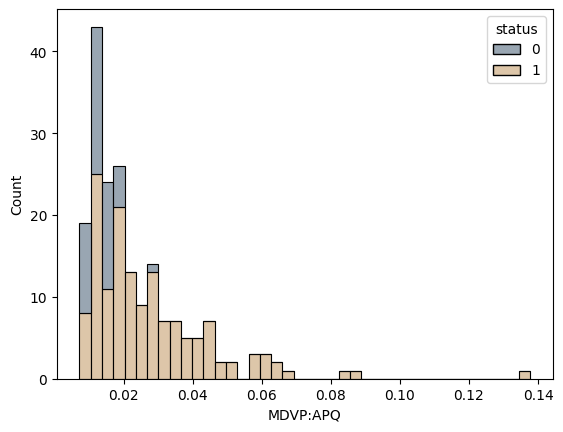

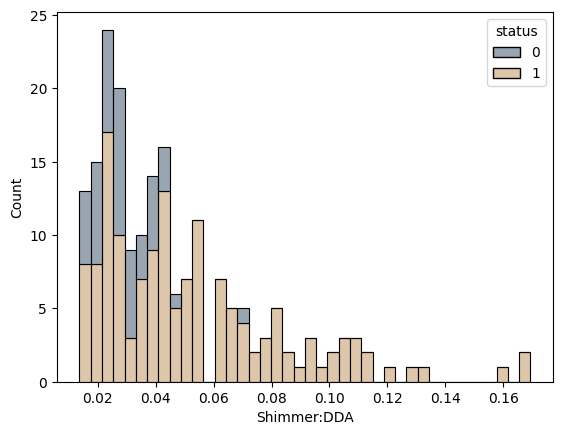

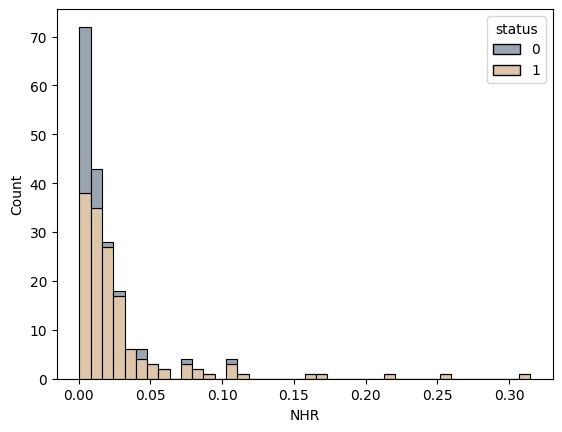

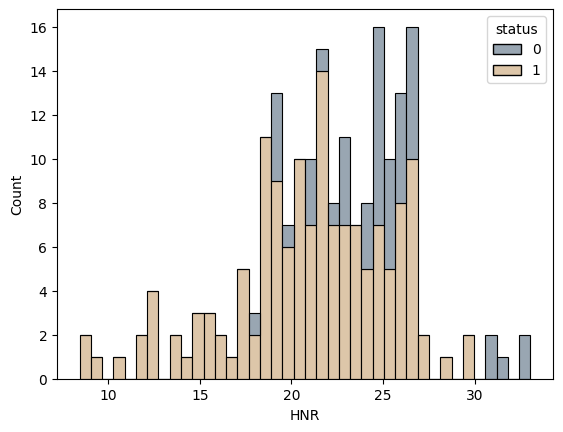

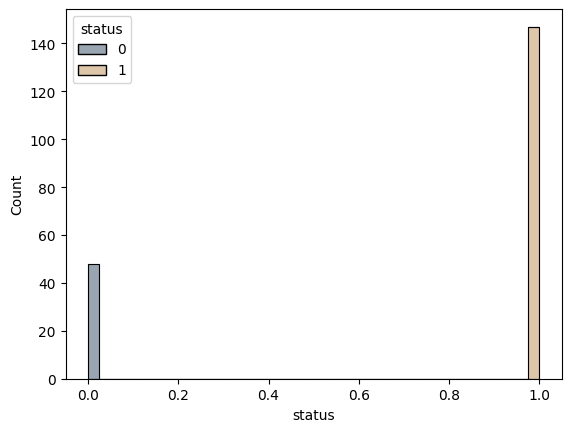

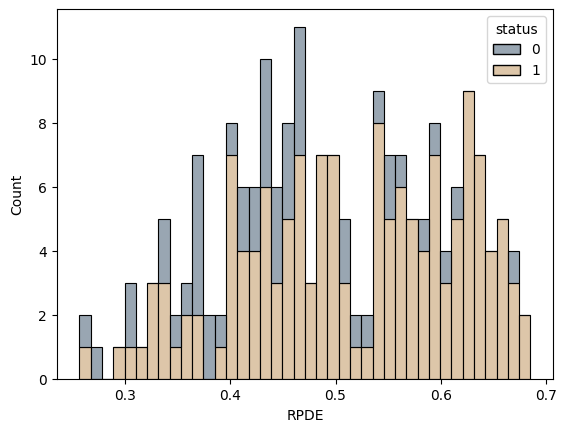

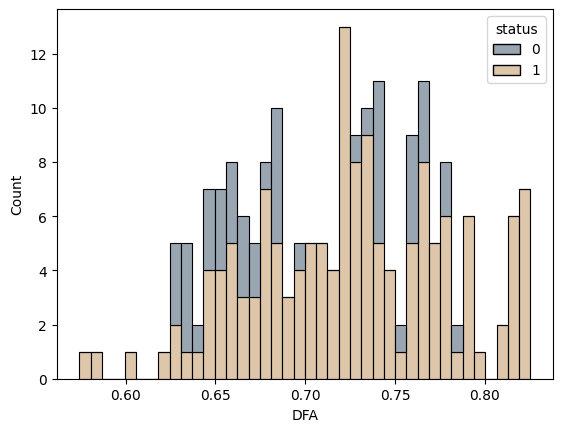

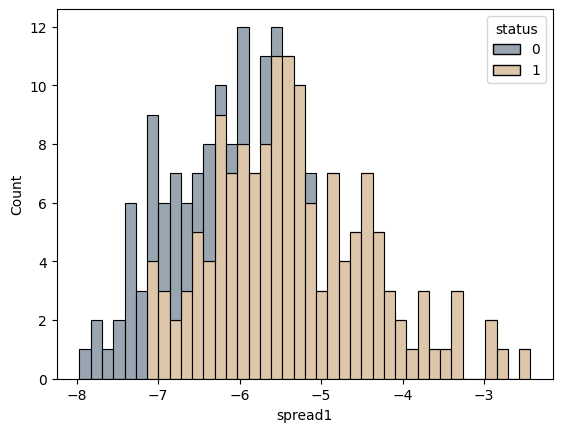

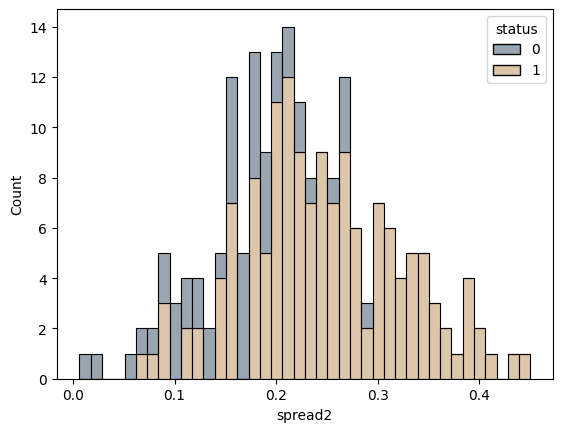

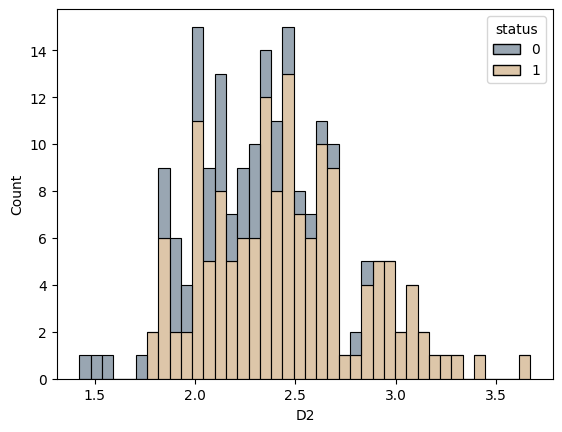

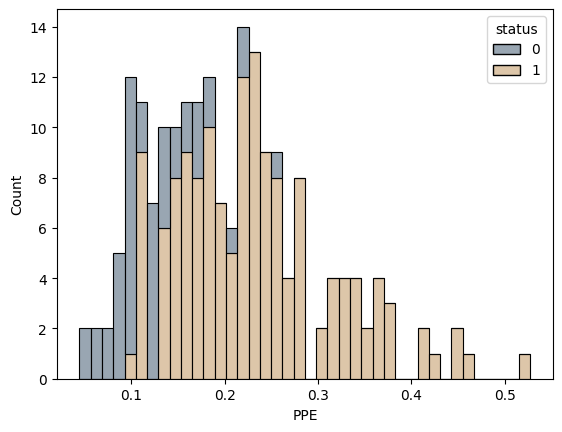

In [ ]:
# generating histograms for each numerical features
for feature in numerical_values:
    sns.histplot(data=new_dataframe, bins=40, x=feature, hue="status", palette=["lightslategrey", "tan"], multiple="stack")
    plt.show()

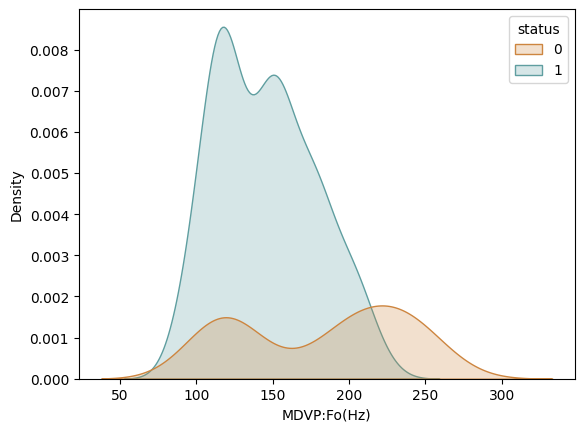

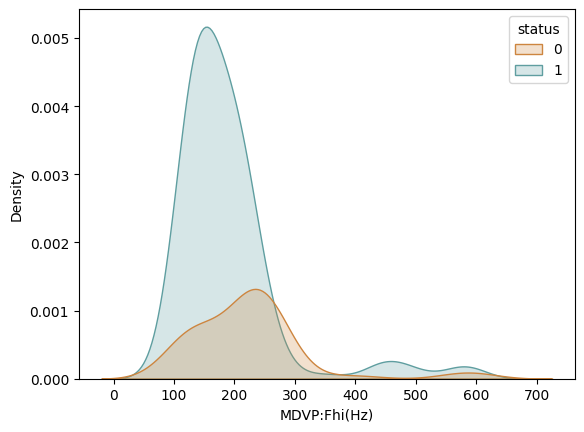

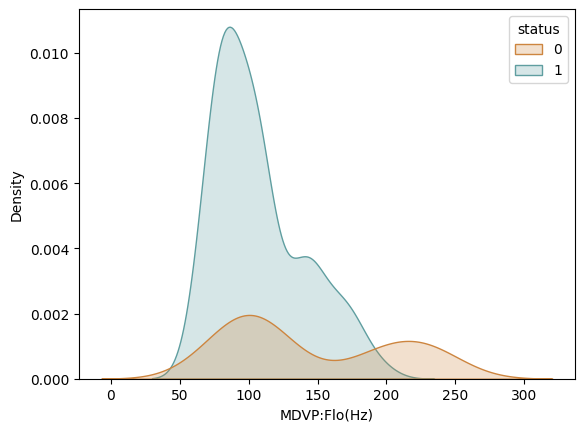

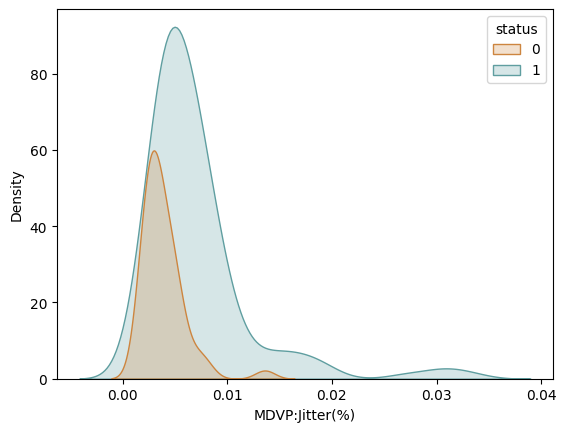

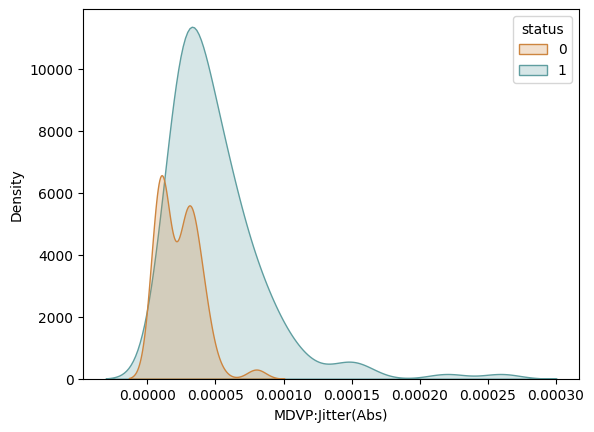

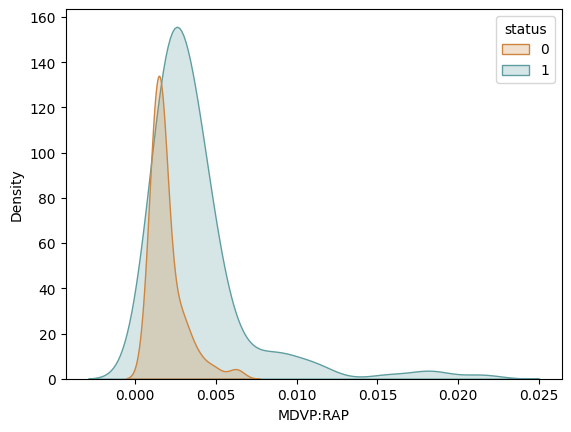

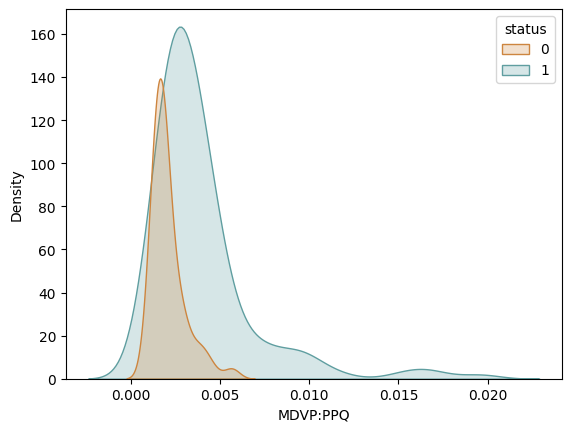

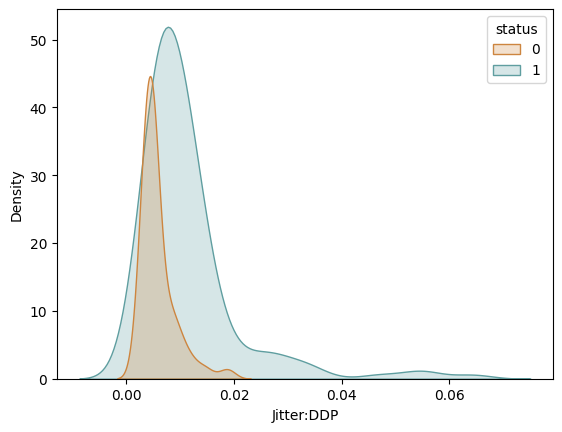

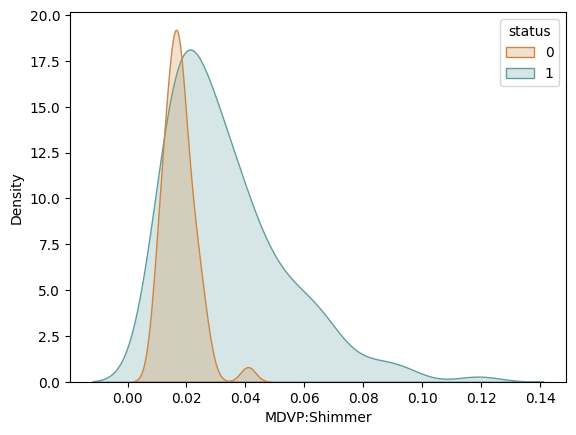

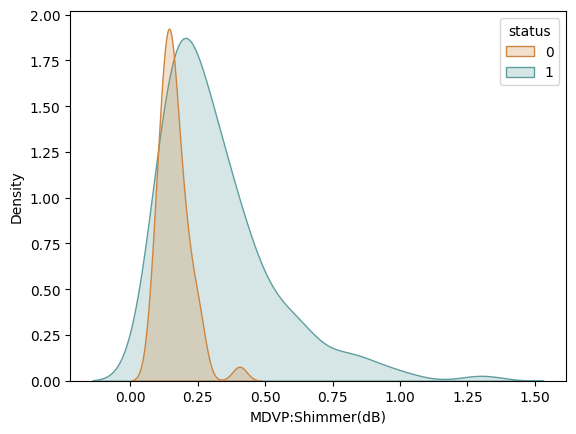

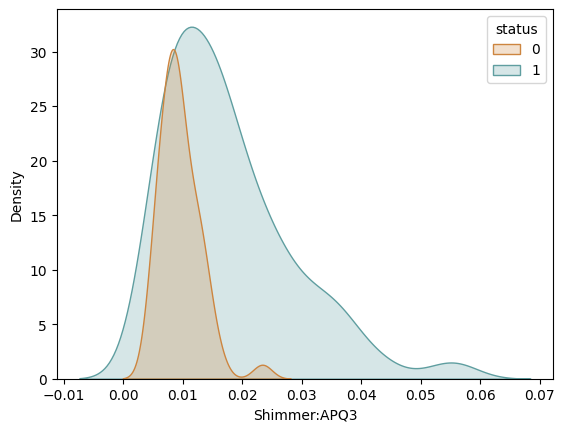

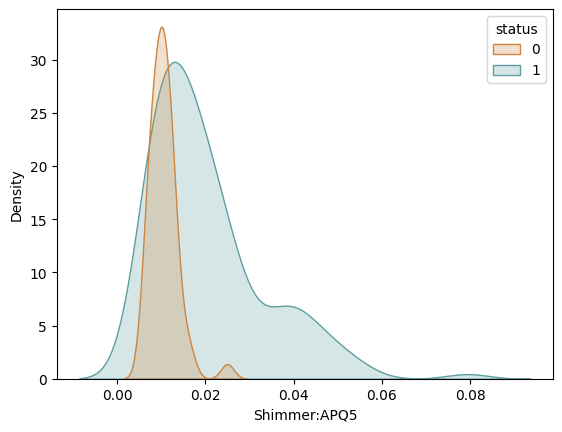

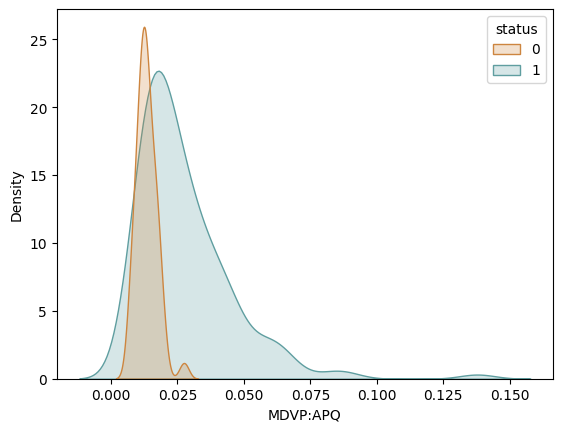

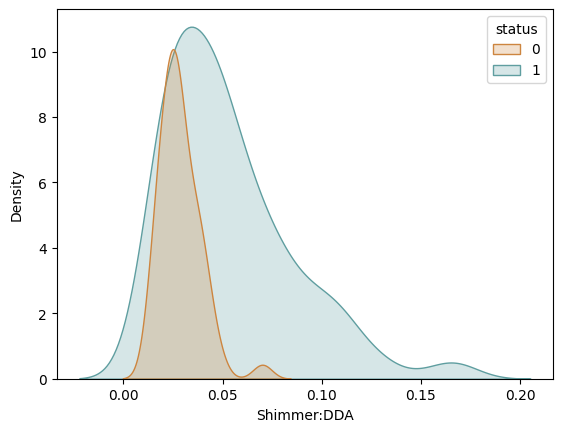

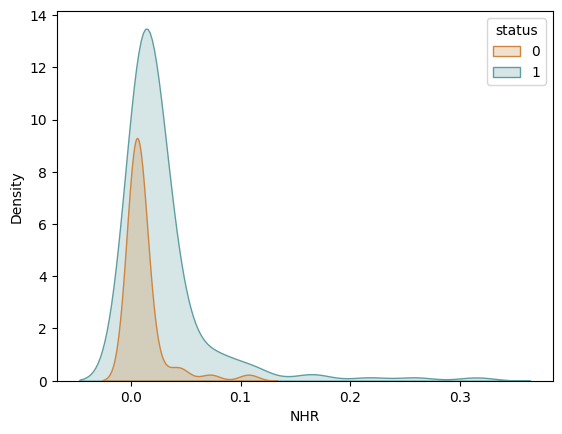

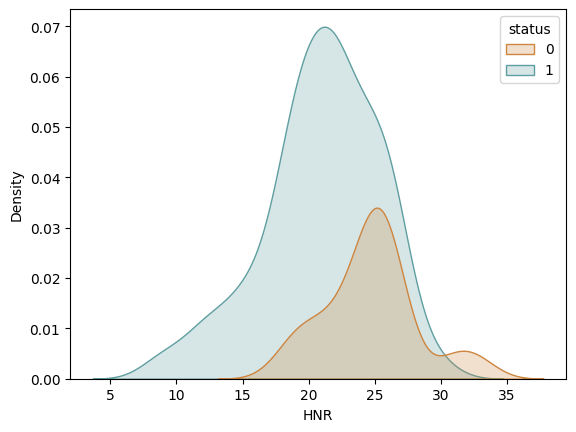

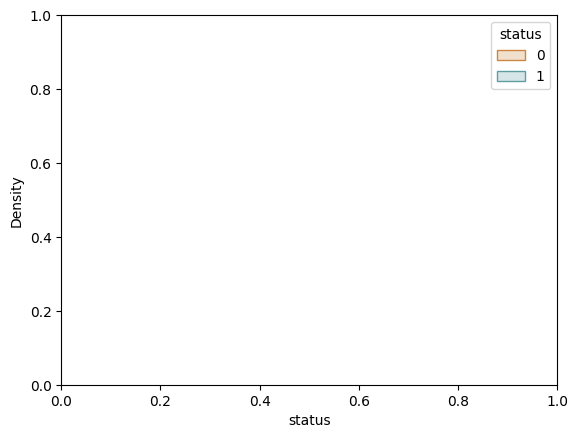

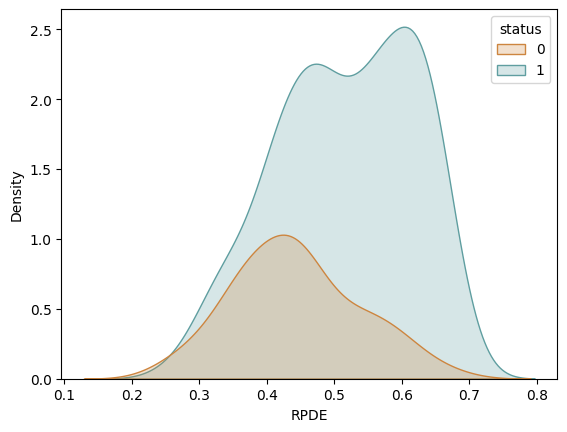

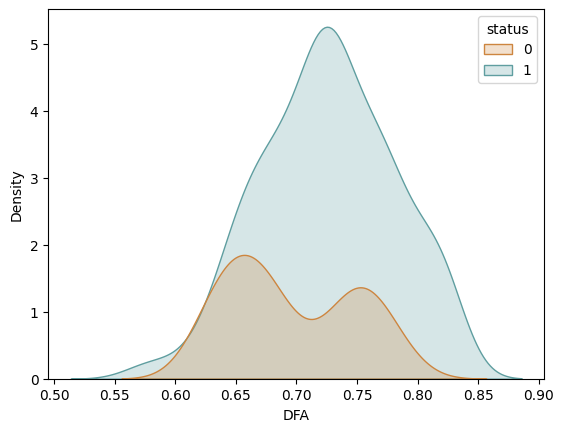

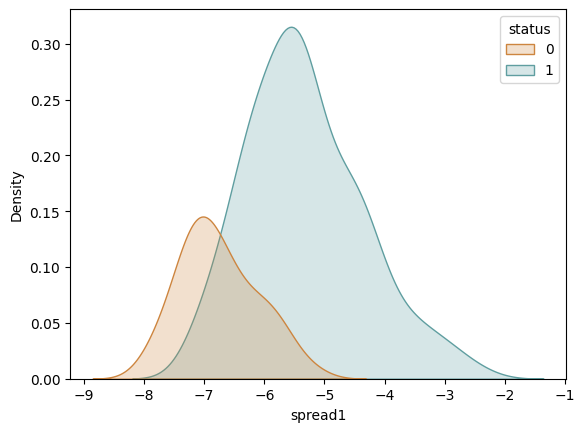

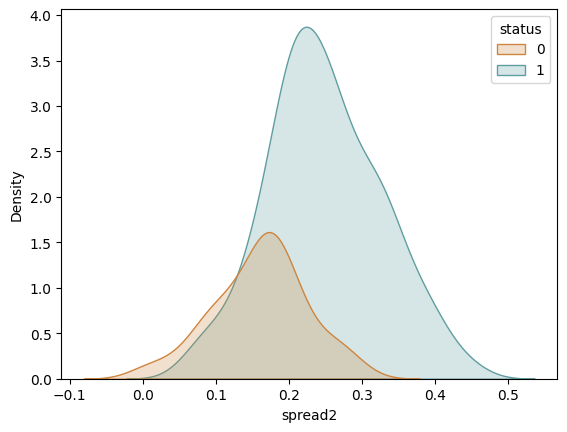

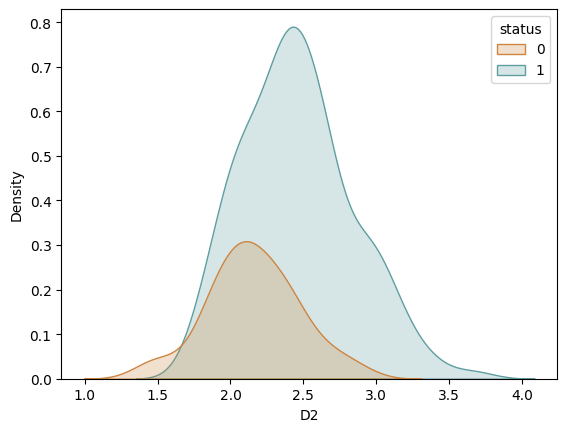

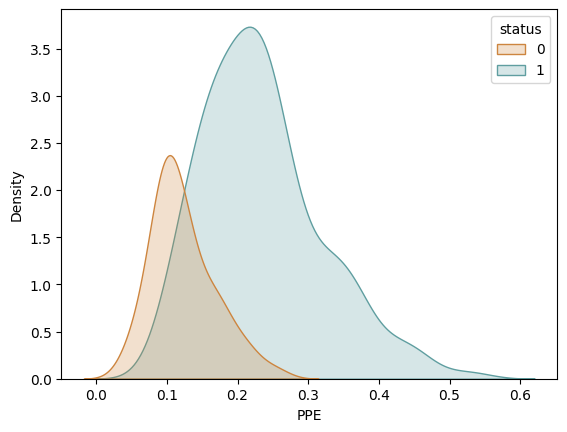

In [57]:
#generating kernel density estimation plot for each numerical feature
for label in numerical_values:
    sns.kdeplot(data=new_dataframe, x=label, hue="status", fill=True, palette=["peru", "cadetblue"], warn_singular=False)
    plt.show()

In [8]:
#new dataframe for healthy subjects
healthy = new_dataframe.query("status == 0")
healthy_df = healthy.drop("status", axis=1)
healthy_df.reset_index(drop=True)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  MDVP:Jitter(Abs)  \
0       197.076       206.896       192.055         0.00289          0.000010   
1       199.228       209.512       192.091         0.00241          0.000010   
2       198.383       215.203       193.104         0.00212          0.000010   
3       202.266       211.604       197.079         0.00180          0.000009   
4       203.184       211.526       196.160         0.00178          0.000009   
..          ...           ...           ...             ...               ...   
43      174.188       230.978        94.261         0.00459          0.000030   
44      209.516       253.017        89.488         0.00564          0.000030   
45      174.688       240.005        74.287         0.01360          0.000080   
46      198.764       396.961        74.904         0.00740          0.000040   
47      214.289       260.277        77.973         0.00567          0.000030   

    MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  MDVP:Shimmer(dB)  \
0    0.00166   0.00168     0.00498       0.01098             0.097   
1    0.00134   0.00138     0.00402       0.01015             0.089   
2    0.00113   0.00135     0.00339       0.01263             0.111   
3    0.00093   0.00107     0.00278       0.00954             0.085   
4    0.00094   0.00106     0.00283       0.00958             0.085   
..       ...       ...         ...           ...               ...   
43   0.00263   0.00259     0.00790       0.04087             0.405   
44   0.00331   0.00292     0.00994       0.02751             0.263   
45   0.00624   0.00564     0.01873       0.02308             0.256   
46   0.00370   0.00390     0.01109       0.02296             0.241   
47   0.00295   0.00317     0.00885       0.01884             0.190   

    Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA      NHR     HNR  \
0        0.00563       0.00680   0.00802      0.01689  0.00339  26.775   
1        0.00504       0.00641   0.00762      0.01513  0.00167  30.940   
2        0.00640       0.00825   0.00951      0.01919  0.00119  30.775   
3        0.00469       0.00606   0.00719      0.01407  0.00072  32.684   
4        0.00468       0.00610   0.00726      0.01403  0.00065  33.047   
..           ...           ...       ...          ...      ...     ...   
43       0.02336       0.02498   0.02745      0.07008  0.02764  19.517   
44       0.01604       0.01657   0.01879      0.04812  0.01810  19.147   
45       0.01268       0.01365   0.01667      0.03804  0.10715  17.883   
46       0.01265       0.01321   0.01588      0.03794  0.07223  19.020   
47       0.01026       0.01161   0.01373      0.03078  0.04398  21.209   

        RPDE       DFA   spread1   spread2        D2       PPE  
0   0.422229  0.741367 -7.348300  0.177551  1.743867  0.085569  
1   0.432439  0.742055 -7.682587  0.173319  2.103106  0.068501  
2   0.465946  0.738703 -7.067931  0.175181  1.512275  0.096320  
3   0.368535  0.742133 -7.695734  0.178540  1.544609  0.056141  
4   0.340068  0.741899 -7.964984  0.163519  1.423287  0.044539  
..       ...       ...       ...       ...       ...       ...  
43  0.448439  0.657899 -6.538586  0.121952  2.657476  0.133050  
44  0.431674  0.683244 -6.195325  0.129303  2.784312  0.168895  
45  0.407567  0.655683 -6.787197  0.158453  2.679772  0.131728  
46  0.451221  0.643956 -6.744577  0.207454  2.138608  0.123306  
47  0.462803  0.664357 -5.724056  0.190667  2.555477  0.148569  

[48 rows x 22 columns]

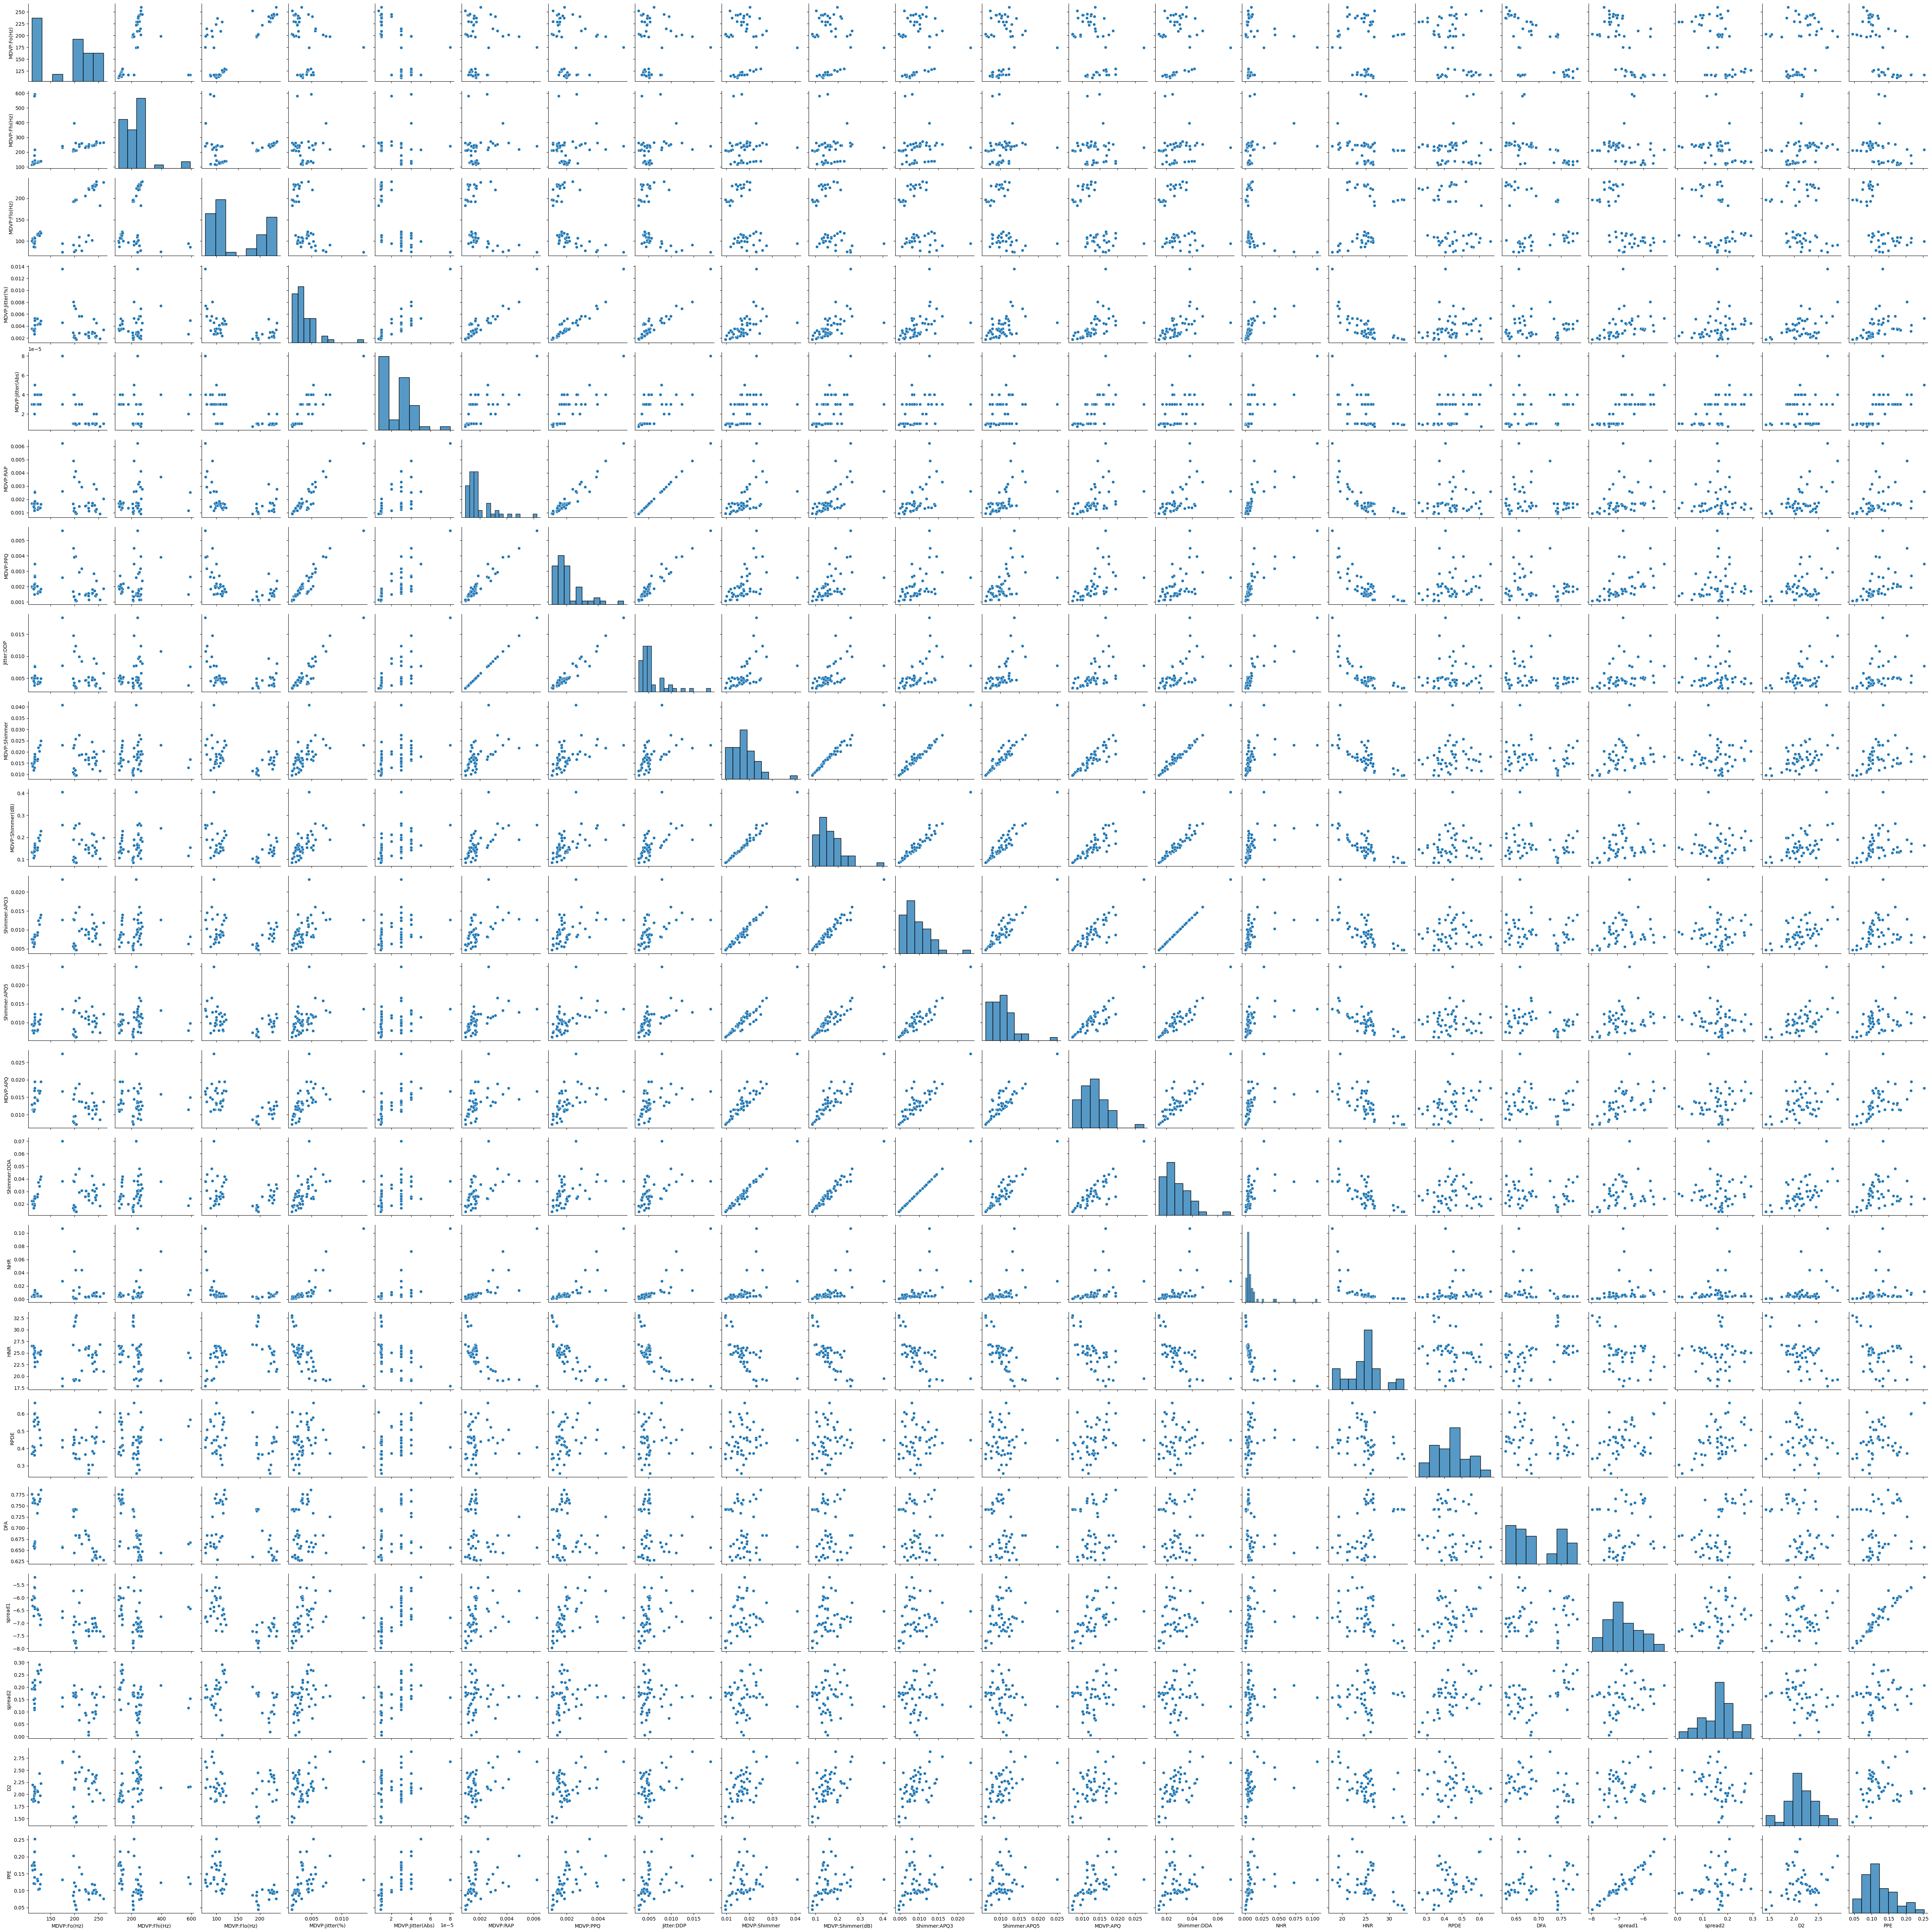

In [9]:
sns.pairplot(healthy_df) #pairplot for healthy subjects

In [10]:
#new dataframe for patients
patient = new_dataframe.query("status == 1")
patient_df = patient.drop("status", axis=1)
patient_df.reset_index(drop=True)

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
142      148.790       158.359       138.990         0.00309   
143      148.143       155.982       135.041         0.00392   
144      150.440       163.441       144.736         0.00396   
145      148.462       161.078       141.998         0.00397   
146      149.818       163.417       144.786         0.00336   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00009   0.00544   0.00781     0.01633       0.05233   
3             0.00009   0.00502   0.00698     0.01505       0.05492   
4             0.00011   0.00655   0.00908     0.01966       0.06425   
..                ...       ...       ...         ...           ...   
142           0.00002   0.00152   0.00186     0.00456       0.01574   
143           0.00003   0.00204   0.00231     0.00612       0.01450   
144           0.00003   0.00206   0.00233     0.00619       0.02551   
145           0.00003   0.00202   0.00235     0.00605       0.01831   
146           0.00002   0.00174   0.00198     0.00521       0.02145   

     MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  MDVP:APQ  Shimmer:DDA  \
0               0.426       0.02182       0.03130   0.02971      0.06545   
1               0.626       0.03134       0.04518   0.04368      0.09403   
2               0.482       0.02757       0.03858   0.03590      0.08270   
3               0.517       0.02924       0.04005   0.03772      0.08771   
4               0.584       0.03490       0.04825   0.04465      0.10470   
..                ...           ...           ...       ...          ...   
142             0.142       0.00839       0.00956   0.01309      0.02518   
143             0.131       0.00725       0.00876   0.01263      0.02175   
144             0.237       0.01321       0.01574   0.02148      0.03964   
145             0.163       0.00950       0.01103   0.01559      0.02849   
146             0.198       0.01155       0.01341   0.01666      0.03464   

         NHR     HNR      RPDE       DFA   spread1   spread2        D2  \
0    0.02211  21.033  0.414783  0.815285 -4.813031  0.266482  2.301442   
1    0.01929  19.085  0.458359  0.819521 -4.075192  0.335590  2.486855   
2    0.01309  20.651  0.429895  0.825288 -4.443179  0.311173  2.342259   
3    0.01353  20.644  0.434969  0.819235 -4.117501  0.334147  2.405554   
4    0.01767  19.649  0.417356  0.823484 -3.747787  0.234513  2.332180   
..       ...     ...       ...       ...       ...       ...       ...   
142  0.00488  24.412  0.402591  0.762508 -6.311987  0.182459  2.251553   
143  0.00540  23.683  0.398499  0.778349 -5.711205  0.240875  2.845109   
144  0.00611  23.133  0.352396  0.759320 -6.261446  0.183218  2.264226   
145  0.00639  22.866  0.408598  0.768845 -5.704053  0.216204  2.679185   
146  0.00595  23.008  0.329577  0.757180 -6.277170  0.109397  2.209021   

          PPE  
0    0.284654  
1    0.368674  
2    0.332634  
3    0.368975  
4    0.410335  
..        ...  
142  0.160306  
143  0.192730  
144  0.144105  
145  0.197710  
146  0.156368  

[147 rows x 22 columns]

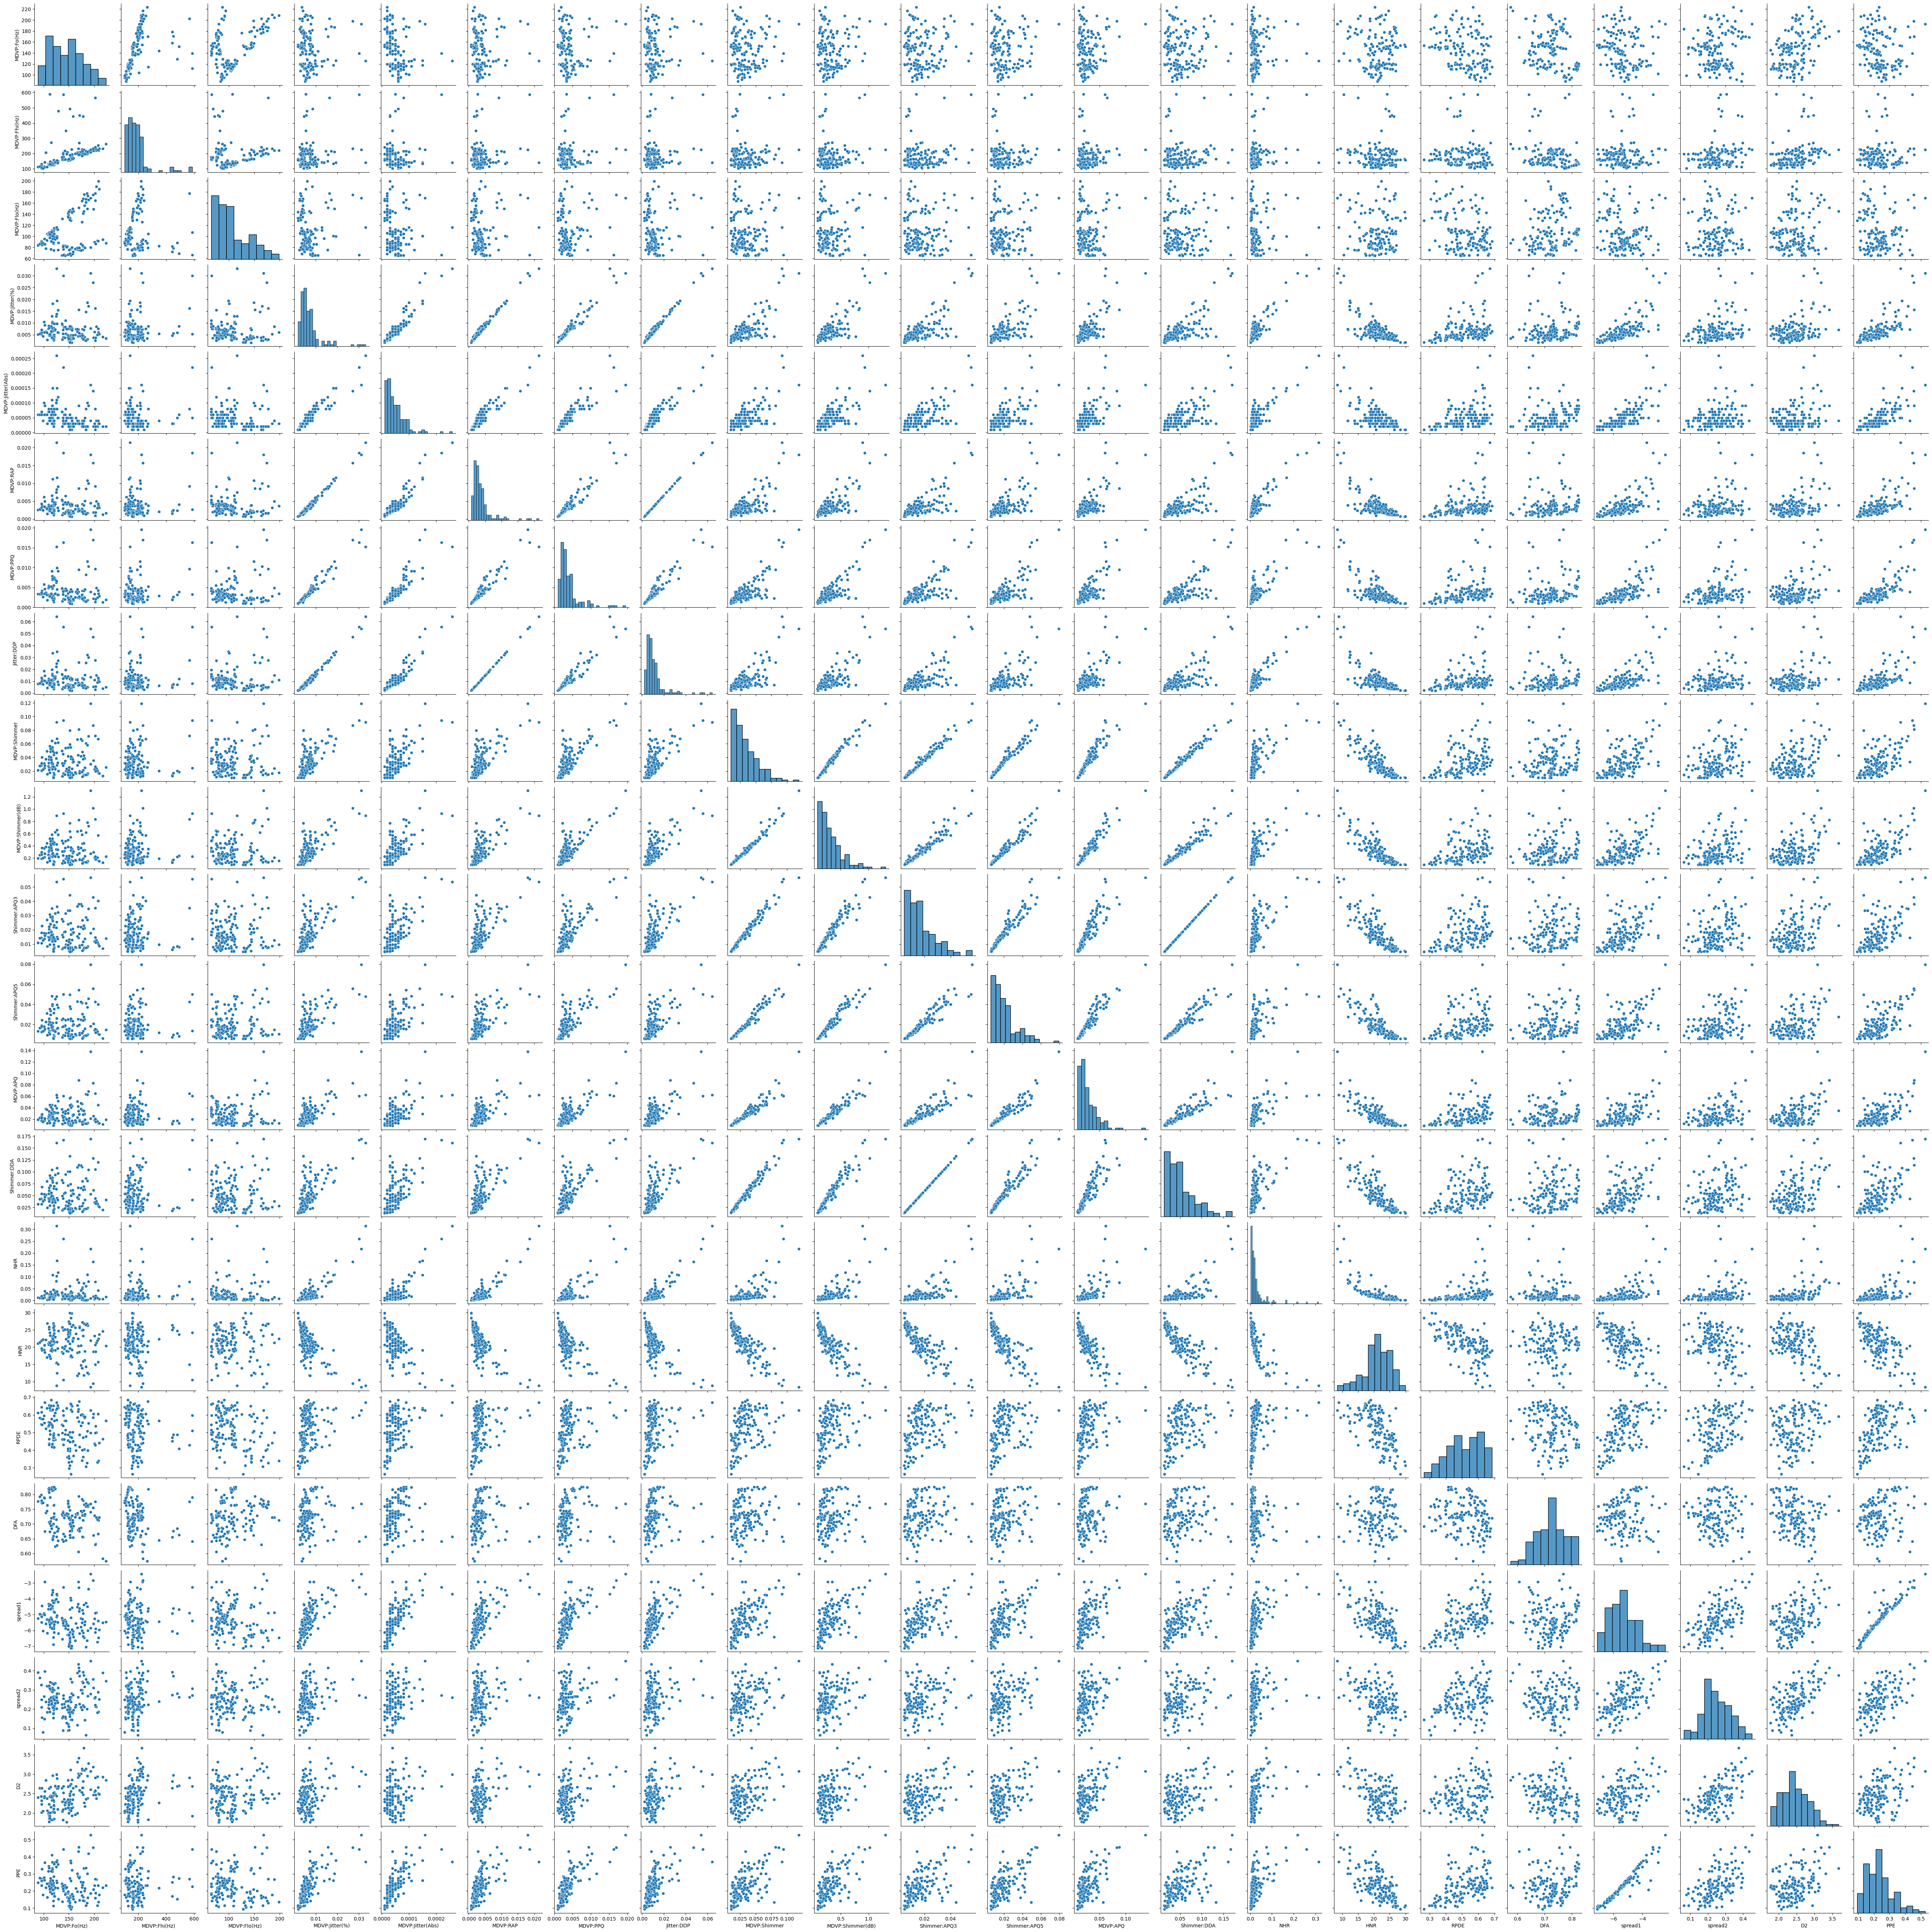

In [11]:
sns.pairplot(patient_df) #pariplot for patients

In [12]:
corr_healthy = healthy_df.corr() #correlation of features within healthy subjects
corr_healthy

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.285265      0.679262       -0.195836   
MDVP:Fhi(Hz)         0.285265      1.000000      0.054727        0.060976   
MDVP:Flo(Hz)         0.679262      0.054727      1.000000       -0.508014   
MDVP:Jitter(%)      -0.195836      0.060976     -0.508014        1.000000   
MDVP:Jitter(Abs)    -0.638657     -0.113488     -0.701662        0.849669   
MDVP:RAP             0.042852      0.185237     -0.378416        0.926424   
MDVP:PPQ            -0.140259      0.125809     -0.505344        0.937148   
Jitter:DDP           0.042476      0.184835     -0.378578        0.926461   
MDVP:Shimmer        -0.008663      0.018636     -0.400876        0.519646   
MDVP:Shimmer(dB)     0.013333      0.059599     -0.393919        0.595898   
Shimmer:APQ3         0.089541      0.024570     -0.310760        0.500412   
Shimmer:APQ5         0.111291      0.091305     -0.361117        0.445159   
MDVP:APQ            -0.322394     -0.050836     -0.573929        0.524537   
Shimmer:DDA          0.089585      0.024427     -0.310695        0.500349   
NHR                  0.033046      0.239361     -0.395497        0.850856   
HNR                 -0.058359     -0.204648      0.343444       -0.719151   
RPDE                -0.375146      0.092519     -0.331701        0.159125   
DFA                 -0.600524     -0.536023     -0.277242       -0.050576   
spread1             -0.648233     -0.152354     -0.664789        0.361779   
spread2             -0.534312     -0.344986     -0.317650        0.241387   
D2                   0.224839      0.192431     -0.193837        0.457435   
PPE                 -0.631147     -0.220555     -0.633983        0.374467   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.638657  0.042852 -0.140259    0.042476   
MDVP:Fhi(Hz)             -0.113488  0.185237  0.125809    0.184835   
MDVP:Flo(Hz)             -0.701662 -0.378416 -0.505344   -0.378578   
MDVP:Jitter(%)            0.849669  0.926424  0.937148    0.926461   
MDVP:Jitter(Abs)          1.000000  0.661930  0.781632    0.662133   
MDVP:RAP                  0.661930  1.000000  0.964356    0.999998   
MDVP:PPQ                  0.781632  0.964356  1.000000    0.964285   
Jitter:DDP                0.662133  0.999998  0.964285    1.000000   
MDVP:Shimmer              0.406605  0.522818  0.503307    0.522897   
MDVP:Shimmer(dB)          0.450987  0.601236  0.575950    0.601360   
Shimmer:APQ3              0.332582  0.517552  0.468493    0.517570   
Shimmer:APQ5              0.295110  0.537129  0.506478    0.537291   
MDVP:APQ                  0.595010  0.442362  0.510767    0.442570   
Shimmer:DDA               0.332501  0.517503  0.468396    0.517522   
NHR                       0.630113  0.817678  0.819080    0.817523   
HNR                      -0.531736 -0.758717 -0.762725   -0.758797   
RPDE                      0.370360  0.021461  0.166761    0.021201   
DFA                       0.191417 -0.216741 -0.169723   -0.216682   
spread1                   0.635510  0.288665  0.472758    0.288938   
spread2                   0.463338  0.007709  0.120941    0.007392   
D2                        0.255613  0.525041  0.468580    0.525036   
PPE                       0.644182  0.316080  0.494788    0.316404   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
MDVP:Fo(Hz)          -0.008663          0.013333      0.089541      0.111291   
MDVP:Fhi(Hz)          0.018636          0.059599      0.024570      0.091305   
MDVP:Flo(Hz)         -0.400876         -0.393919     -0.310760     -0.361117   
MDVP:Jitter(%)        0.519646          0.595898      0.500412      0.445159   
MDVP:Jitter(Abs)      0.406605          0.450987      0.332582      0.295110   
MDVP:RAP              0.522818          0.601236      0.517552      0.537129   
MDVP:PPQ              0.503307          0.575950      0.468493      0.50647

<Axes: >

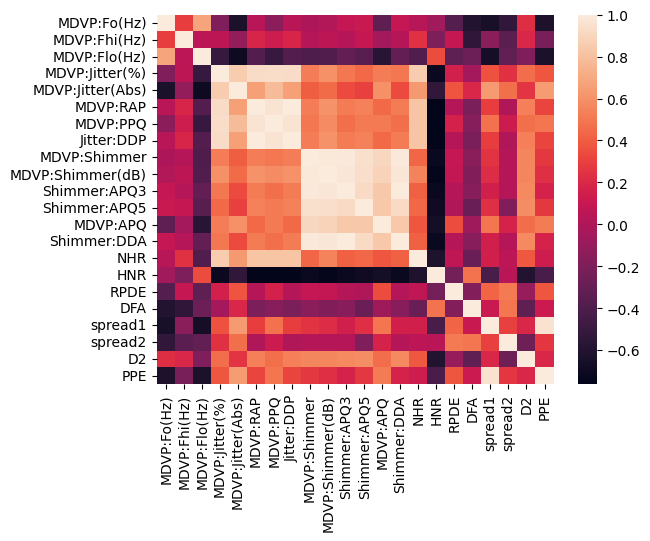

In [ ]:
sns.heatmap(corr_healthy) #correlation heatmap for healthy subjects

In [14]:
corr_matrix = new_dataframe.corr() #generating correlation matrix using Pearson's correlation
corr_matrix

MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
MDVP:Fo(Hz)          1.000000      0.400985      0.596546       -0.118003   
MDVP:Fhi(Hz)         0.400985      1.000000      0.084951        0.102086   
MDVP:Flo(Hz)         0.596546      0.084951      1.000000       -0.139919   
MDVP:Jitter(%)      -0.118003      0.102086     -0.139919        1.000000   
MDVP:Jitter(Abs)    -0.382027     -0.029198     -0.277815        0.935714   
MDVP:RAP            -0.076194      0.097177     -0.100519        0.990276   
MDVP:PPQ            -0.112165      0.091126     -0.095828        0.974256   
Jitter:DDP          -0.076213      0.097150     -0.100488        0.990276   
MDVP:Shimmer        -0.098374      0.002281     -0.144543        0.769063   
MDVP:Shimmer(dB)    -0.073742      0.043465     -0.119089        0.804289   
Shimmer:APQ3        -0.094717     -0.003743     -0.150747        0.746625   
Shimmer:APQ5        -0.070682     -0.009997     -0.101095        0.725561   
MDVP:APQ            -0.077774      0.004937     -0.107293        0.758255   
Shimmer:DDA         -0.094732     -0.003733     -0.150737        0.746635   
NHR                 -0.021981      0.163766     -0.108670        0.906959   
HNR                  0.059144     -0.024893      0.210851       -0.728165   
status              -0.383535     -0.166136     -0.380200        0.278220   
RPDE                -0.383894     -0.112404     -0.400143        0.360673   
DFA                 -0.446013     -0.343097     -0.050406        0.098572   
spread1             -0.413738     -0.076658     -0.394857        0.693577   
spread2             -0.249450     -0.002954     -0.243829        0.385123   
D2                   0.177980      0.176323     -0.100629        0.433434   
PPE                 -0.372356     -0.069543     -0.340071        0.721543   

                  MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  \
MDVP:Fo(Hz)              -0.382027 -0.076194 -0.112165   -0.076213   
MDVP:Fhi(Hz)             -0.029198  0.097177  0.091126    0.097150   
MDVP:Flo(Hz)             -0.277815 -0.100519 -0.095828   -0.100488   
MDVP:Jitter(%)            0.935714  0.990276  0.974256    0.990276   
MDVP:Jitter(Abs)          1.000000  0.922911  0.897778    0.922913   
MDVP:RAP                  0.922911  1.000000  0.957317    1.000000   
MDVP:PPQ                  0.897778  0.957317  1.000000    0.957319   
Jitter:DDP                0.922913  1.000000  0.957319    1.000000   
MDVP:Shimmer              0.703322  0.759581  0.797826    0.759555   
MDVP:Shimmer(dB)          0.716601  0.790652  0.839239    0.790621   
Shimmer:APQ3              0.697153  0.744912  0.763580    0.744894   
Shimmer:APQ5              0.648961  0.709927  0.786780    0.709907   
MDVP:APQ                  0.648793  0.737455  0.804139    0.737439   
Shimmer:DDA               0.697170  0.744919  0.763592    0.744901   
NHR                       0.834972  0.919521  0.844604    0.919548   
HNR                      -0.656810 -0.721543 -0.731510   -0.721494   
status                    0.338653  0.266668  0.288698    0.266646   
RPDE                      0.441839  0.342140  0.333274    0.342079   
DFA                       0.175036  0.064083  0.196301    0.064026   
spread1                   0.735779  0.648328  0.716489    0.648328   
spread2                   0.388543  0.324407  0.407605    0.324377   
D2                        0.310694  0.426605  0.412524    0.426556   
PPE                       0.748162  0.670999  0.769647    0.671005   

                  MDVP:Shimmer  MDVP:Shimmer(dB)  Shimmer:APQ3  Shimmer:APQ5  \
MDVP:Fo(Hz)          -0.098374         -0.073742     -0.094717     -0.070682   
MDVP:Fhi(Hz)          0.002281          0.043465     -0.003743     -0.009997   
MDVP:Flo(Hz)         -0.144543         -0.119089     -0.150747     -0.101095   
MDVP:Jitter(%)        0.769063          0.804289      0.746625      0.725561   
MDVP:Jitter(Abs)      0.703322          0.716601      0.697153      0.648961   
MDVP:RAP

<Axes: >

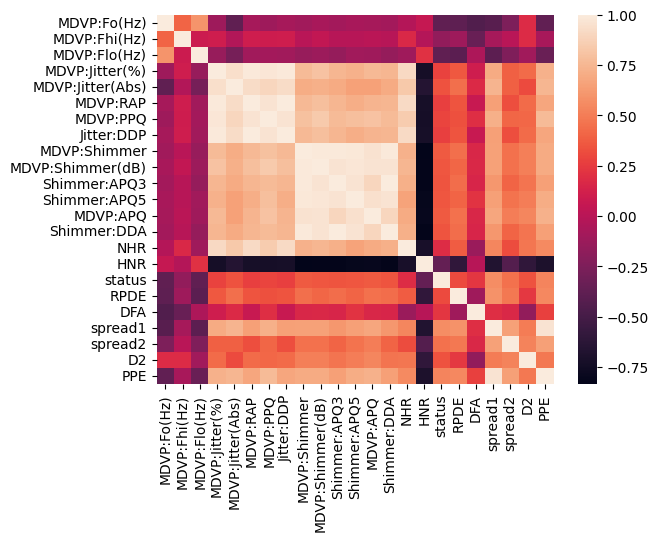

In [15]:
sns.heatmap(corr_matrix) #generating a Seaborn correlation heatmap from correlation matrix

In [ ]:
#creating dictionary with feature sets above a correlation threshold value
corr_threshold = 0.8
corr_matrix.where(abs(corr_matrix) > corr_threshold).stack().to_dict()

{('MDVP:Fo(Hz)', 'MDVP:Fo(Hz)'): 1.0,
 ('MDVP:Fhi(Hz)', 'MDVP:Fhi(Hz)'): 1.0,
 ('MDVP:Flo(Hz)', 'MDVP:Flo(Hz)'): 1.0,
 ('MDVP:Jitter(%)', 'MDVP:Jitter(%)'): 1.0,
 ('MDVP:Jitter(%)', 'MDVP:Jitter(Abs)'): 0.9357139812023576,
 ('MDVP:Jitter(%)', 'MDVP:RAP'): 0.9902755852458324,
 ('MDVP:Jitter(%)', 'MDVP:PPQ'): 0.9742563864635724,
 ('MDVP:Jitter(%)', 'Jitter:DDP'): 0.9902762153275699,
 ('MDVP:Jitter(%)', 'MDVP:Shimmer(dB)'): 0.8042892804109836,
 ('MDVP:Jitter(%)', 'NHR'): 0.9069586005733022,
 ('MDVP:Jitter(Abs)', 'MDVP:Jitter(%)'): 0.9357139812023576,
 ('MDVP:Jitter(Abs)', 'MDVP:Jitter(Abs)'): 1.0,
 ('MDVP:Jitter(Abs)', 'MDVP:RAP'): 0.9229109688984641,
 ('MDVP:Jitter(Abs)', 'MDVP:PPQ'): 0.8977779044154587,
 ('MDVP:Jitter(Abs)', 'Jitter:DDP'): 0.9229130329829802,
 ('MDVP:Jitter(Abs)', 'NHR'): 0.834972175372741,
 ('MDVP:RAP', 'MDVP:Jitter(%)'): 0.9902755852458324,
 ('MDVP:RAP', 'MDVP:Jitter(Abs)'): 0.9229109688984641,
 ('MDVP:RAP', 'MDVP:RAP'): 1.0,
 ('MDVP:RAP', 'MDVP:PPQ'): 0.9573168930480

<Axes: xlabel='MDVP:Shimmer', ylabel='Shimmer:DDA'>

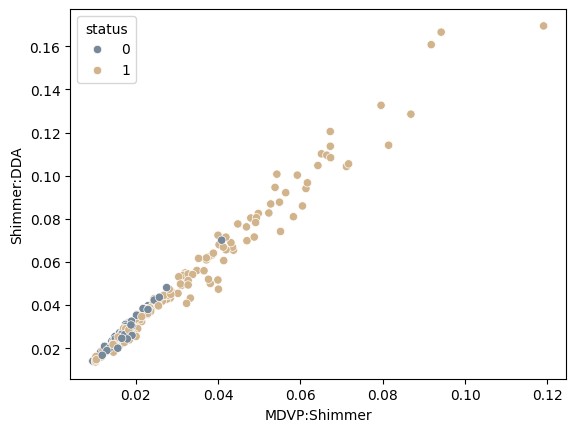

In [56]:
#scatterplots of highly correlated features colored by subject status
sns.scatterplot(x="MDVP:Shimmer", y="Shimmer:DDA", hue="status", palette=["lightslategrey", "tan"], data=new_dataframe)

<Axes: xlabel='MDVP:Shimmer', ylabel='Shimmer:APQ3'>

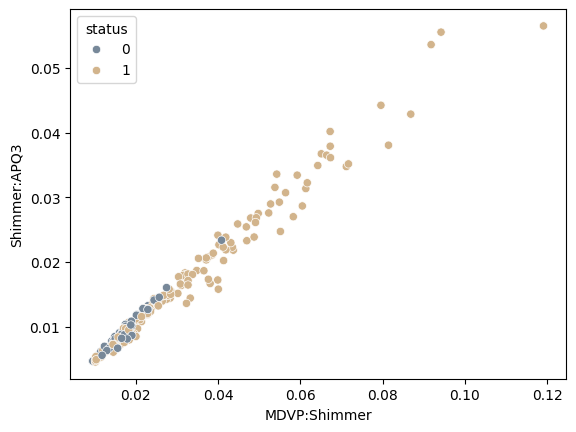

In [55]:
sns.scatterplot(x="MDVP:Shimmer", y="Shimmer:APQ3", hue="status", palette=["lightslategrey", "tan"], data=new_dataframe)

<Axes: xlabel='Shimmer:DDA', ylabel='Shimmer:APQ3'>

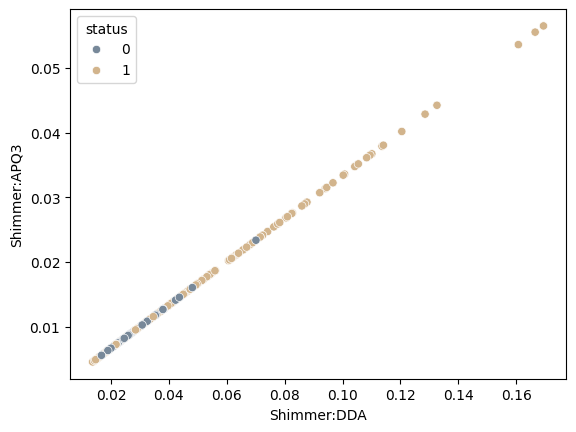

In [54]:
sns.scatterplot(x="Shimmer:DDA", y="Shimmer:APQ3", hue="status", palette=["lightslategrey", "tan"], data=new_dataframe)

In [53]:
# plt.hist([new_dataframe["Shimmer:APQ3"], new_dataframe["Shimmer:DDA"]], bins=40, label=["Shimmer:APQ3", "Shimmer:DDA"], stacked=True, color= ["lightslategrey", "tan"], edgecolor="azure")
# plt.xlabel("Values")
# plt.ylabel("Frequency")
# plt.legend(loc="upper right")
# plt.show()